<a href="https://colab.research.google.com/github/codeskeet/Drone-Simulation/blob/master/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset : http://cb.lk/covid_19

!wget  http://cb.lk/covid_19

--2020-12-30 06:32:25--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-12-30 06:32:26--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-30 06:32:27--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-30 06:32:27--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [5]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

DESIRED_ACC = 0.98

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > DESIRED_ACC):
       print("\nReached 98% accuracy so cancelling training!")
       self.model.stop_training = True

callbacks = myCallback()

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [6]:
# CNN Based Model in Keras

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
#Training of the model

train_datagen = image.ImageDataGenerator(
   rescale = 1./255,
   shear_range = 0.2,
   zoom_range = 0.2,
   horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
   'CovidDataset/Train',
   target_size = (224,224),
   batch_size = 32,
   class_mode = 'binary'
)


Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
   target_size = (224,224),
   batch_size = 32,
   class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [12]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 2,
    callbacks = [callbacks]
)

Epoch 1/15
6/6 [==============================] - 17s 2s/step - loss: 3.9969 - accuracy: 0.5325 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/15
6/6 [==============================] - 10s 2s/step - loss: 0.6963 - accuracy: 0.5144 - val_loss: 0.6455 - val_accuracy: 0.9000
Epoch 3/15
6/6 [==============================] - 9s 2s/step - loss: 0.5723 - accuracy: 0.7356 - val_loss: 0.4109 - val_accuracy: 0.9333
Epoch 4/15
6/6 [==============================] - 10s 2s/step - loss: 0.3479 - accuracy: 0.8686 - val_loss: 0.2531 - val_accuracy: 0.9500
Epoch 5/15
6/6 [==============================] - 10s 2s/step - loss: 0.3288 - accuracy: 0.8463 - val_loss: 0.2772 - val_accuracy: 0.9167
Epoch 6/15
6/6 [==============================] - 10s 2s/step - loss: 0.2310 - accuracy: 0.9147 - val_loss: 0.1525 - val_accuracy: 0.9667
Epoch 7/15
6/6 [==============================] - 9s 2s/step - loss: 0.1560 - accuracy: 0.9365 - val_loss: 0.2537 - val_accuracy: 0.9667
Epoch 8/15
6/6 [====================

In [13]:
model.save("model_adv.h5")

In [14]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1197558268904686, 0.9508928656578064]

In [15]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0904059186577797, 0.9833333492279053]

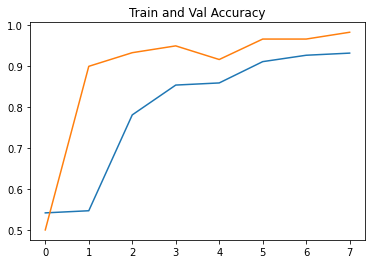

<Figure size 432x288 with 0 Axes>

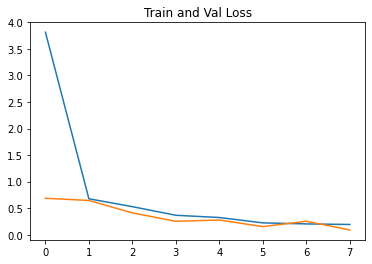

<Figure size 432x288 with 0 Axes>

In [16]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title('Train and Val Accuracy')
plt.figure()
plt.show()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Train and Val Loss')
plt.figure()
plt.show()

In [20]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  x = np.expand_dims(x,axis = 0)

  images = np.vstack(x)
  print(x.shape)
  classes = model.predict(images,batch_size = 32)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + 'is Normal')
  else:
    print(fn + 'is COVID')

Saving IM-0125-0001.jpeg to IM-0125-0001 (2).jpeg
Saving WhatsApp Image 2020-12-30 at 12.18.11.jpeg to WhatsApp Image 2020-12-30 at 12.18.11.jpeg
(1, 1, 224, 224, 3)
[1.]
IM-0125-0001.jpegis Normal
(1, 1, 224, 224, 3)
[1.]
WhatsApp Image 2020-12-30 at 12.18.11.jpegis Normal


In [21]:
pip install FLask